# Import TensorFlow

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

%matplotlib inline

# Download and prepare the CIFAR10 dataset
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [ ]:
train_ds, test_ds = tfds.load('cifar10', split=['train','test'], as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incomplete0ES6UI/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incomplete0ES6UI/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


Scale the data from 0-255 (color pixel) to 0-1
and apply data augmentation

In [ ]:
def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.divide(image, 255)
    return image, label

def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_saturation(image, 0.7, 1.3)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    image = tf.image.random_brightness(image, 0.1)
    return image, label 

train = train_ds.map(normalize).cache().map(augment).shuffle(100).batch(128)
test = test_ds.map(normalize).cache().batch(64)

In [ ]:
BATCH_SIZE = 128
NUM_EPOCHS = 50

# 3 Convolution Layer

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Model is the full model w/o custom layers
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

CALLBACK = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=3)

history = model.fit(train, epochs=NUM_EPOCHS, validation_data=test, callbacks=CALLBACK)


Epoch 1/50
391/391 [==============================] - 19s 42ms/step - loss: 1.5211 - accuracy: 0.4610 - val_loss: 1.5468 - val_accuracy: 0.4643
Epoch 2/50
391/391 [==============================] - 16s 41ms/step - loss: 1.1480 - accuracy: 0.5942 - val_loss: 1.4419 - val_accuracy: 0.5127
Epoch 3/50
391/391 [==============================] - 13s 33ms/step - loss: 1.0206 - accuracy: 0.6414 - val_loss: 1.1634 - val_accuracy: 0.5952
Epoch 4/50
391/391 [==============================] - 13s 32ms/step - loss: 0.9292 - accuracy: 0.6748 - val_loss: 1.2006 - val_accuracy: 0.6132
Epoch 5/50
391/391 [==============================] - 13s 33ms/step - loss: 0.8691 - accuracy: 0.6961 - val_loss: 0.9403 - val_accuracy: 0.6702
Epoch 6/50
391/391 [==============================] - 13s 34ms/step - loss: 0.8281 - accuracy: 0.7124 - val_loss: 0.9315 - val_accuracy: 0.6799
Epoch 7/50
391/391 [==============================] - 13s 33ms/step - loss: 0.7875 - accuracy: 0.7262 - val_loss: 0.8402 - val_accuracy:

In [ ]:
def plot_history(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

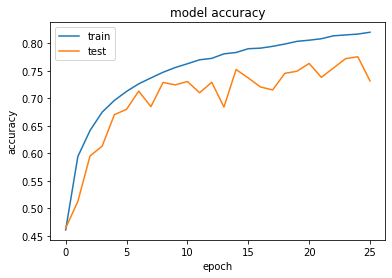

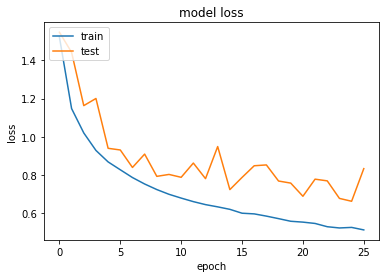

In [ ]:
plot_history(history)

# 3 Convolution Layer with no Augmentation

In [ ]:
train_no_aug = train_ds.map(normalize).cache().shuffle(100).batch(64)

In [ ]:
model_no_aug = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Model is the full model w/o custom layers
model_no_aug.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

CALLBACK = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=3)

history_no_aug = model_no_aug.fit(train, epochs=NUM_EPOCHS, validation_data=test, callbacks=CALLBACK)


Epoch 1/50
391/391 [==============================] - 14s 33ms/step - loss: 1.4803 - accuracy: 0.4759 - val_loss: 1.7815 - val_accuracy: 0.3172
Epoch 2/50
391/391 [==============================] - 13s 34ms/step - loss: 1.1272 - accuracy: 0.6050 - val_loss: 1.3167 - val_accuracy: 0.5288
Epoch 3/50
391/391 [==============================] - 13s 33ms/step - loss: 0.9890 - accuracy: 0.6533 - val_loss: 1.0604 - val_accuracy: 0.6274
Epoch 4/50
391/391 [==============================] - 13s 33ms/step - loss: 0.8918 - accuracy: 0.6896 - val_loss: 1.0125 - val_accuracy: 0.6491
Epoch 5/50
391/391 [==============================] - 13s 33ms/step - loss: 0.8303 - accuracy: 0.7091 - val_loss: 1.1496 - val_accuracy: 0.6242
Epoch 6/50
391/391 [==============================] - 13s 33ms/step - loss: 0.7884 - accuracy: 0.7245 - val_loss: 1.0025 - val_accuracy: 0.6602
Epoch 7/50
391/391 [==============================] - 13s 33ms/step - loss: 0.7449 - accuracy: 0.7404 - val_loss: 0.9198 - val_accuracy:

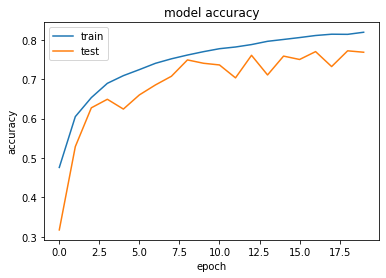

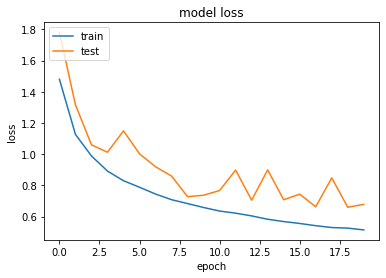

In [ ]:
plot_history(history_no_aug)

# 2 Convolution Layer

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Model is the full model w/o custom layers
model2.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

CALLBACK = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=3)

history2 = model2.fit(train, epochs=NUM_EPOCHS, validation_data=test, callbacks=CALLBACK)


Epoch 1/50
391/391 [==============================] - 14s 32ms/step - loss: 1.4893 - accuracy: 0.4712 - val_loss: 1.5002 - val_accuracy: 0.4447
Epoch 2/50
391/391 [==============================] - 12s 31ms/step - loss: 1.1157 - accuracy: 0.6059 - val_loss: 1.0930 - val_accuracy: 0.6137
Epoch 3/50
391/391 [==============================] - 12s 31ms/step - loss: 0.9951 - accuracy: 0.6527 - val_loss: 1.1673 - val_accuracy: 0.6028
Epoch 4/50
391/391 [==============================] - 12s 31ms/step - loss: 0.9239 - accuracy: 0.6751 - val_loss: 1.0750 - val_accuracy: 0.6274
Epoch 5/50
391/391 [==============================] - 13s 33ms/step - loss: 0.8740 - accuracy: 0.6929 - val_loss: 0.9321 - val_accuracy: 0.6752
Epoch 6/50
391/391 [==============================] - 13s 32ms/step - loss: 0.8307 - accuracy: 0.7095 - val_loss: 0.9316 - val_accuracy: 0.6746
Epoch 7/50
391/391 [==============================] - 13s 34ms/step - loss: 0.7950 - accuracy: 0.7231 - val_loss: 0.9220 - val_accuracy:

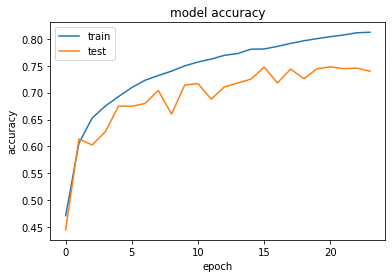

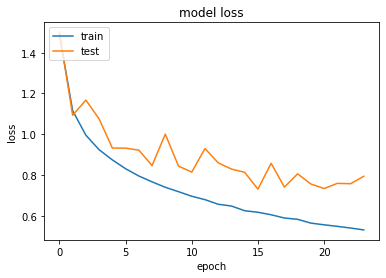

In [ ]:
plot_history(history2)